# Sobre o trabalho

O trabalho a seguir foi feito utilizando dados obtidos de um questionário de pesquisa de intenção de voto da eleição para prefeito de Coari do ano de 2012. 


# Preparação do dataframe

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Download do Dataframe abaixo
!npx degit wfsilva-uea/coari/coari_db_filtrado.csv coari_db.csv -f

npx: installed 1 in 0.834s
! ENOTDIR: not a directory, scandir 'coari_db.csv'


In [ ]:
types = {
  'Idade': int, 
  'Genero': str, 
  'Faixa': str, 
  'Bairro': str, 
  'Prioridade': str, 
  'Intencao': str, 
  'Por Omar': str, 
  'Por Braga': str, 
}
# Abertura inicial do dataframe
df = pd.read_csv('coari_db.csv', dtype=types)
df["Intencao"].replace({
    'g': 'Desconhecido',    
    'f': 'Nulo',    
    'h': 'Desconhecido'
}, inplace=True)


# Leitura do dataframe

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    461 non-null    int64  
 1   Idade         461 non-null    int64  
 2   Faixa         461 non-null    object 
 3   Bairro        461 non-null    object 
 4   Genero        461 non-null    object 
 5   Prioridade    453 non-null    object 
 6   Intencao      425 non-null    object 
 7   Por Omar      461 non-null    object 
 8   Por Braga     460 non-null    object 
 9   Escolaridade  461 non-null    object 
 10  Renda         415 non-null    float64
dtypes: float64(1), int64(2), object(8)
memory usage: 39.7+ KB


**Conclusão do comando info()**: a coluna "intenção de voto" e "prioridades em coari" apresentam a maior taixa de dados nulos (por conta do entrevistado não quis responder). a coluna "votaria em quem for indicado pelo Braga" apresenta 1 uma pessoa que não quis responder.

In [ ]:
df.tail() 
# aperto apenas final para confirmar total de 461 (0-460) itens presente no dataframe.


,Unnamed: 0,Idade,Faixa,Bairro,Genero,Prioridade,Intencao,Por Omar,Por Braga,Escolaridade,Renda
456,456,16,16 e 17,Do Pera,Masculino,Segurança,Adail,Sim,Sim,Não Alfabetizado,NaN
457,457,37,30 a 39,Do Pera,Masculino,Infraestrutura,Adail,Sem Opinião,Sim,Fundam. Completo,700.0
458,458,30,30 a 39,Do Pera,Masculino,Emprego,Adail,Sim,Não,Médio Completo,1300.0
459,459,32,30 a 39,Do Pera,Masculino,Emprego,Adail,Sem Opinião,Sem Opinião,Fundam. Incompleto,NaN
460,460,54,50 a 59,Do Pera,Feminino,Emprego,Adail,Sim,Não,Fundam. Incompleto,450.0


## Divisão Populacional por Gênero

In [ ]:
val_genero = df["Genero"].value_counts()
val_genero

Feminino     232
Masculino    229
Name: Genero, dtype: int64

In [ ]:
a = val_genero.to_numpy()
print(
    "\n percentil eh:",np.percentile(a, 1),
    "\n média eh:",np.mean(a),
    "\n mediana eh:", np.median(a))



 percentil eh: 229.03 
 média eh: 230.5 
 mediana eh: 230.5


## Divisão Populacional por Bairro

In [ ]:
val_bairro = df["Bairro"].value_counts()
val_bairro

Chagas            60
Urucu             55
União             55
Centro            54
Itamarati         47
Tauá Mirim        47
Santa Efigênia    31
Duque             29
Santa Helena      28
Do Pera           28
Espirito Santo    23
Z - Rural          3
centro             1
Name: Bairro, dtype: int64

In [ ]:
a = val_bairro.to_numpy()
print(
    "\n percentil eh:",np.percentile(a, 1),
    "\n média eh:",np.mean(a),
    "\n mediana eh:", np.median(a))


 percentil eh: 1.24 
 média eh: 35.46153846153846 
 mediana eh: 31.0


## Divisão Populacional por Faixa Etária

In [ ]:
val_idade = df["Idade"].value_counts()
val_idade

18    29
19    21
21    21
29    21
30    17
      ..
68     1
66     1
65     1
80     1
91     1
Name: Idade, Length: 61, dtype: int64

In [ ]:
a = val_idade.to_numpy()
print(
    "\n percentil eh:",np.percentile(a, 1),
    "\n média eh:",np.mean(a),
    "\n mediana eh:", np.median(a))


 percentil eh: 1.0 
 média eh: 7.557377049180328 
 mediana eh: 6.0


In [ ]:
val_faixa = df["Faixa"].value_counts()
val_faixa

30 a 39    99
18 a 21    85
40 a 49    65
25 a 29    63
22 a 24    44
50 a 59    42
60 e +     39
16 e 17    24
Name: Faixa, dtype: int64

### Tabela cruzada "Genero" x "Faixa Etária"

In [ ]:
tab02=pd.crosstab(df["Genero"],df["Faixa"],margins=True)
tab02

Faixa,16 e 17,18 a 21,22 a 24,25 a 29,30 a 39,40 a 49,50 a 59,60 e +,All
Genero,,,,,,,,,
Feminino,14,45,22,34,47,31,17,22,232
Masculino,10,40,22,29,52,34,25,17,229
All,24,85,44,63,99,65,42,39,461


## Divisão Populacional segundo Problema Prioritário

In [ ]:
val_prioridade = df["Prioridade"].value_counts()
val_prioridade

Emprego                     122
Saúde                       121
Segurança                    39
Salário                      29
Corrupção                    25
Asfalto                      19
Saneamento e urbanização     19
Infraestrutura               16
Educação                     16
Renda                        14
Outros                        9
Administração pública         9
Moradia                       8
Energia                       4
Água                          2
Transporte                    1
Name: Prioridade, dtype: int64

In [ ]:
a = val_prioridade.to_numpy()

print(
    "\n percentil eh:",np.percentile(a, 1),
    "\n média eh:",np.mean(a),
    "\n mediana eh:", np.median(a))


 percentil eh: 1.15 
 média eh: 28.3125 
 mediana eh: 16.0


### Tabela cruzada "Prioridade em Coari" x "Bairro"

In [ ]:
tab03=pd.crosstab(df["Prioridade"],df["Bairro"],margins=True)
tab03

Bairro,Centro,Chagas,Do Pera,Duque,Espirito Santo,Itamarati,Santa Efigênia,Santa Helena,Tauá Mirim,União,Urucu,Z - Rural,centro,All
Prioridade,,,,,,,,,,,,,,
Administração pública,0,2,0,0,2,2,0,0,1,1,1,0,0,9
Asfalto,0,4,0,3,0,5,0,2,0,1,4,0,0,19
Corrupção,3,3,2,3,0,2,2,1,0,6,1,2,0,25
Educação,3,1,1,2,0,1,0,0,3,1,4,0,0,16
Emprego,10,12,8,9,6,13,10,9,11,21,11,1,1,122
Energia,0,0,0,0,0,1,0,0,0,0,3,0,0,4
Infraestrutura,2,1,3,0,1,1,0,3,2,2,1,0,0,16
Moradia,0,1,1,0,0,2,1,0,2,0,1,0,0,8
Outros,1,0,1,1,0,0,0,1,3,1,1,0,0,9


## Divisão Populacional segundo pretenção de voto

In [ ]:
val_intencao = df["Intencao"].value_counts()
val_intencao

Adail           174
Magalhaes       137
Nulo             50
Mitouso          45
indeciso          9
Iran              7
Desconhecido      2
C.T.              1
Name: Intencao, dtype: int64

In [ ]:
a = val_intencao.to_numpy()
print(
    "\n percentil eh:",np.percentile(a, 1),
    "\n média eh:",np.mean(a),
    "\n mediana eh:", np.median(a))


 percentil eh: 1.0699999999999998 
 média eh: 53.125 
 mediana eh: 27.0


### Tabela cruzada "Intenção de Voto" x "Faixa Etária"

In [ ]:
tab04=pd.crosstab(df["Intencao"],df["Faixa"],margins=True)
tab04

Faixa,16 e 17,18 a 21,22 a 24,25 a 29,30 a 39,40 a 49,50 a 59,60 e +,All
Intencao,,,,,,,,,
Adail,8,27,14,28,46,27,15,9,174
C.T.,0,0,1,0,0,0,0,0,1
Desconhecido,0,1,1,0,0,0,0,0,2
Iran,2,2,0,1,1,0,1,0,7
Magalhaes,10,33,19,19,18,16,13,9,137
Mitouso,1,6,4,5,10,6,4,9,45
Nulo,0,12,3,7,11,7,3,7,50
indeciso,0,1,0,2,3,1,2,0,9
All,21,82,42,62,89,57,38,34,425


## Divisão Populacional segundo influência Omar x Braga

In [ ]:
val_omar = df["Por Omar"].value_counts()
val_omar

Sem Opinião    183
Sim            158
Não            120
Name: Por Omar, dtype: int64

In [ ]:
val_braga = df["Por Braga"].value_counts()
val_braga

Sim            178
Sem Opinião    143
Não            138
b                1
Name: Por Braga, dtype: int64

### Tabela cruzada "Braga" x "Bairro"

In [ ]:
tab01=pd.crosstab(df["Por Braga"],df["Bairro"],margins=True)
tab01

Bairro,Centro,Chagas,Do Pera,Duque,Espirito Santo,Itamarati,Santa Efigênia,Santa Helena,Tauá Mirim,União,Urucu,Z - Rural,centro,All
Por Braga,,,,,,,,,,,,,,
Não,15,11,7,12,7,10,14,7,22,12,20,0,1,138
Sem Opinião,15,19,11,8,8,18,7,11,11,19,14,2,0,143
Sim,23,30,10,9,8,19,10,10,14,23,21,1,0,178
b,0,0,0,0,0,0,0,0,0,1,0,0,0,1
All,53,60,28,29,23,47,31,28,47,55,55,3,1,460


### Tabela cruzada "Omar" x "Bairro"

In [ ]:
tab00=pd.crosstab(df["Por Omar"],df["Bairro"],margins=True)
tab00
# tabela cruzada entre influência por Braga e por Omar

Bairro,Centro,Chagas,Do Pera,Duque,Espirito Santo,Itamarati,Santa Efigênia,Santa Helena,Tauá Mirim,União,Urucu,Z - Rural,centro,All
Por Omar,,,,,,,,,,,,,,
Não,8,17,4,10,8,11,7,4,23,11,17,0,0,120
Sem Opinião,20,21,9,11,9,21,13,17,16,25,19,1,1,183
Sim,26,22,15,8,6,15,11,7,8,19,19,2,0,158
All,54,60,28,29,23,47,31,28,47,55,55,3,1,461


## Divisão Populacional por Escolaridade

In [ ]:
val_escola = df["Escolaridade"].value_counts()
val_escola

Médio Completo         155
Fundam. Incompleto     111
Médio Incompleto        73
Não Alfabetizado        29
Fundam. Completo        28
Apenas Alfabetizado     26
Superior Incompleto     20
Pós graduação           19
Name: Escolaridade, dtype: int64

In [ ]:
a = val_escola.to_numpy()

print(
    "\n percentil eh:",np.percentile(a, 1),
    "\n média eh:",np.mean(a),
    "\n mediana eh:", np.median(a))


 percentil eh: 19.069999999999997 
 média eh: 57.625 
 mediana eh: 28.5


### Tabela cruzada "Escolaridade" x "Intencao"

In [ ]:
tab07=pd.crosstab(df["Escolaridade"],df["Intencao"],margins=True)
tab07

Intencao,Adail,C.T.,Desconhecido,Iran,Magalhaes,Mitouso,Nulo,indeciso,All
Escolaridade,,,,,,,,,
Apenas Alfabetizado,19,0,0,0,3,0,0,0,22
Fundam. Completo,14,0,0,0,10,2,2,0,28
Fundam. Incompleto,47,1,0,1,27,7,16,2,101
Médio Completo,53,0,1,3,47,20,20,3,147
Médio Incompleto,30,0,0,3,24,3,5,2,67
Não Alfabetizado,7,0,0,0,5,8,2,0,22
Pós graduação,2,0,1,0,11,2,2,1,19
Superior Incompleto,2,0,0,0,10,3,3,1,19
All,174,1,2,7,137,45,50,9,425


## Divisão Populacional por Renda

In [ ]:
val_renda = df["Renda"].value_counts()
val_renda

650.0     91
1000.0    41
1300.0    38
600.0     25
2000.0    24
          ..
135.0      1
980.0      1
120.0      1
240.0      1
640.0      1
Name: Renda, Length: 64, dtype: int64

In [ ]:
a = val_renda.to_numpy()

print(
    "\n percentil eh:",np.percentile(a, 1),
    "\n média eh:",np.mean(a),
    "\n mediana eh:", np.median(a))


 percentil eh: 1.0 
 média eh: 6.484375 
 mediana eh: 1.0


#### Dados Cruzados de Renda por Faixa Etária

In [ ]:
df_faixa_renda = df.groupby(by=['Faixa'])['Renda'].mean()
df_faixa_renda

Faixa
16 e 17    1387.000000
18 a 21    1204.589041
22 a 24    1101.615385
25 a 29    1307.965517
30 a 39    2953.720430
40 a 49    1659.034483
50 a 59    1368.184211
60 e +     1070.833333
Name: Renda, dtype: float64

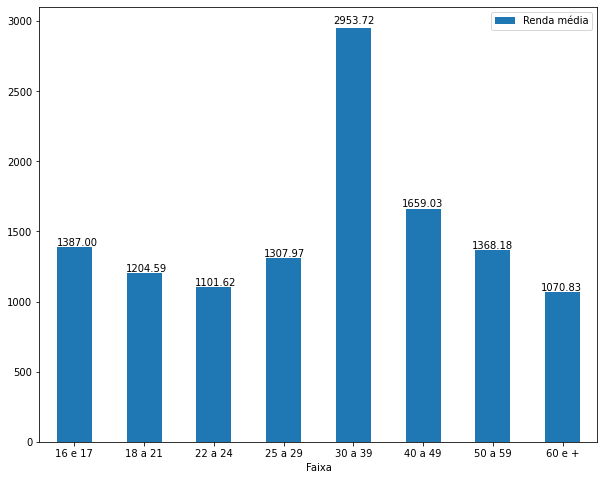

In [ ]:
df_faixa_renda_plot = df_faixa_renda.to_frame(name='Renda média')
ax = df_faixa_renda_plot.plot.bar(y='Renda média', rot=0, figsize=(10, 8))
for p in ax.patches:
    ax.annotate('%.2f' % p.get_height(), (p.get_x() * .99, p.get_height() * 1.009))

### Dados Cruzados Renda por Faixa Etária por Intenção de Voto

In [ ]:

df_faixa_renda = df.groupby(by=['Faixa', 'Intencao'])['Renda'].mean().to_frame().reset_index()
pd.pivot_table(df_faixa_renda, values='Renda', index='Intencao', columns='Faixa', fill_value='-', margins=True)

Faixa,16 e 17,18 a 21,22 a 24,25 a 29,30 a 39,40 a 49,50 a 59,60 e +,All
Intencao,,,,,,,,,
Adail,1070,941.391,740.214,1195.38,4426.07,1070.17,1715.38,816.667,1496.91
Desconhecido,-,883,-,-,-,-,-,-,883
Iran,500,650,-,500,2000,-,3141,-,1358.2
Magalhaes,1943.75,1422.5,1041.67,1344.44,2063.06,1446.88,965.385,1833.33,1507.63
Mitouso,100,1090,3800,1020,1316.67,2900,2200,906.25,1666.61
Nulo,-,1442,675,856.4,1319,3518.57,825,714.286,1335.75
indeciso,-,1300,-,5150,1150,1800,475,-,1975
All,903.438,1104.13,1564.22,1677.7,2045.8,2147.12,1553.63,1067.63,1530.2
